https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones/

https://towardsdatascience.com/reverse-engineering-spotify-wrapped-ai-using-python-452b58ad1a62

https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

# Import and Settings
### Python - 3.9.10

In [13]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from spotipy.oauth2 import SpotifyClientCredentials

In [14]:
cid = 'your_client_id'
secret = 'your_secret_id'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [15]:
# Playlist Link
playlist_link = "https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE?si=cb97d0c0919449a7"

playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [16]:
playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df = pd.DataFrame(columns = playlist_features_list)
    
playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df = pd.concat([df, track_df], ignore_index = True)

# return playlist_df


# Column Info & Conversions

In [17]:
df.head()

# df.describe()

# df.isna().any()

# df.dtypes

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,÷ (Deluxe),95.977,233713,0.825,0.652,1,-3.183,0,0.0802,0,0.0931,0.931,4
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,After Hours,171.005,200040,0.514,0.73,1,-5.934,1,0.0598,0.000095,0.0897,0.334,4
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones And I,Dance Monkey (Stripped Back) / Dance Monkey,98.027,209438,0.824,0.588,6,-6.4,0,0.0924,0.000104,0.149,0.513,4
3,7wGoVu4Dady5GV0Sv4UIsx,rockstar,Post Malone,rockstar,159.772,218320,0.577,0.522,5,-6.594,0,0.0984,0.00009,0.142,0.119,4
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,109.891,182161,0.501,0.405,1,-5.679,1,0.0319,0,0.105,0.446,4


In [18]:
# Converting and Renaming
df = df.astype({"tempo": float,
                "duration_ms": float,
                "danceability": float,
                "energy": float,
                "key": float,
                "loudness": float,
                "mode": int,
                "speechiness": float,
                "instrumentalness": float,
                "liveness": float,
                "valence": float,
                "time_signature": int
                # "energy": float,
                 })

                 
df.rename(columns={
#     'artist':'Artist',
#     'album':'Album',
#     'track_name':'Track', 
#     'track_id':'ID', 
#     'danceability':'Danceability', 
#     'energy':'Energy', 
#     'key':'Key', 
#     'loudness':'Loudness', 
#     'mode':'Mode', 
#     'speechiness':'Speechiness', 
#     'instrumentalness':'Instrumentalness', 
#     'liveness':'Liveness', 
#     'valence':'Valence', 
#     'tempo':'Tempo', 
    'duration_ms':'duration_m'
#     'time_signature':'Time_Signature'
    }, inplace=True)

df['duration_m'] = (df['duration_m'] / 1000 ) /60

df[['track_name','speechiness']]


,track_name,speechiness
0,Shape of You,0.0802
1,Blinding Lights,0.0598
2,Dance Monkey,0.0924
3,rockstar,0.0984
4,Someone You Loved,0.0319
...,...,...
95,New Me,0.2260
96,Cheap Thrills,0.1050
97,Do I Wanna Know?,0.0323
98,Girls Like You (feat. Cardi B) - Cardi B Version,0.0505


# Specific Metrics

In [19]:

# Max / Min Tempo
df[df['tempo']==df['tempo'].min()][['track_name', 'tempo','duration_m']]

# Longest Song
# df[df['duration_m']==df['duration_m'].max()]['track_name']


# Temp
df[df['speechiness']==df['speechiness'].max()][['track_name', 'artist','speechiness']]
# df[df['speechiness']==df['speechiness'].min()][['track_name', 'artist','speechiness']]


,track_name,artist,speechiness
32,Love Yourself,Justin Bieber,0.438


# Visualisations

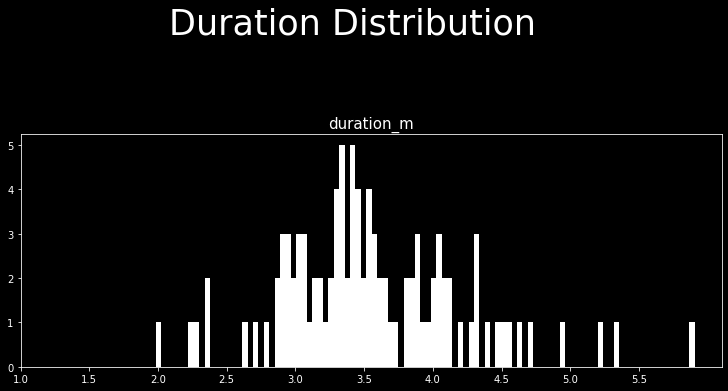

In [20]:
dur_hist = df[['duration_m']]

duration_max = int(df[['duration_m']].max() + 0.5)
duration_min = int(df[['duration_m']].min())

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Duration Distribution',
                horizontalalignment="right",
                fontstyle = "normal", 
                fontsize = 35, 
                fontfamily = "sans-serif")

for i in range(dur_hist.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(dur_hist.columns.values[i],fontsize='15')

    vals = np.size(dur_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(dur_hist.iloc[:, i], 
                bins=vals, 
                color = 'white')

# X axis tick rate
mpl.xticks(np.arange(duration_min, duration_max, 0.5))
mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.05, 2, 0.95])

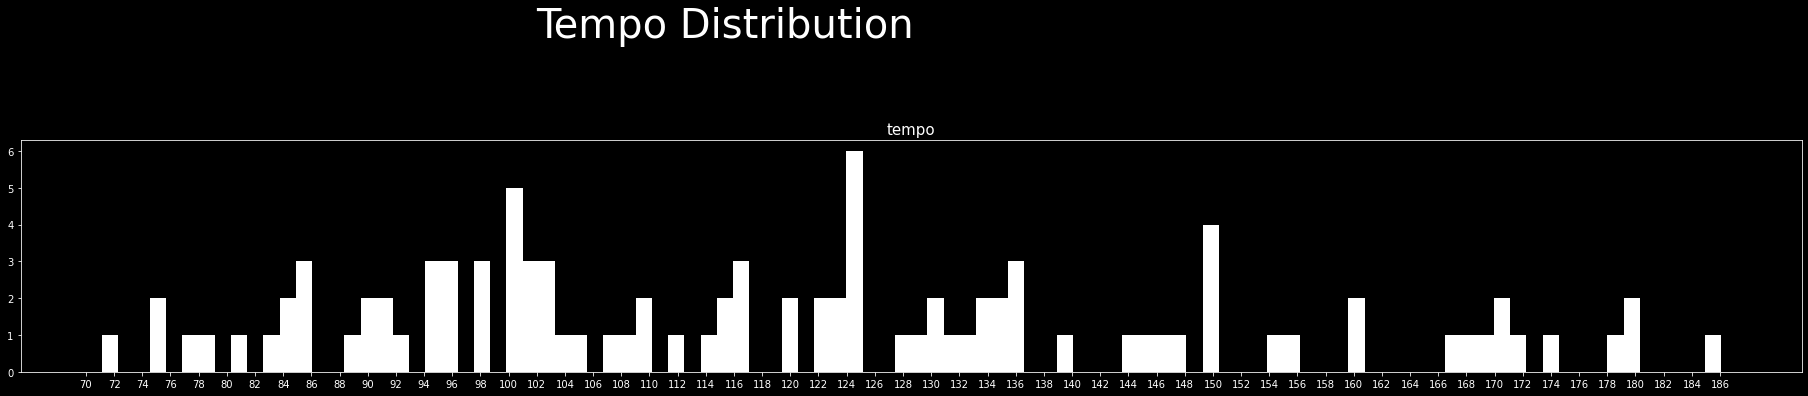

In [21]:
tempo_hist = df[['tempo']]

tempo_max = int(df[['tempo']].max() + 1)
tempo_min = int(df[['tempo']].min() - 1)

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Tempo Distribution',
                horizontalalignment="left",
                fontstyle = "normal", 
                fontsize = 40, 
                fontfamily = "sans-serif")

for i in range(tempo_hist.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(tempo_hist.columns.values[i],fontsize='15')

    vals = np.size(tempo_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(tempo_hist.iloc[:, i], 
                bins=vals, 
                color = 'white')

# X axis tick rate
mpl.xticks(np.arange(tempo_min, tempo_max, 2))
mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.05, 5, 0.95])

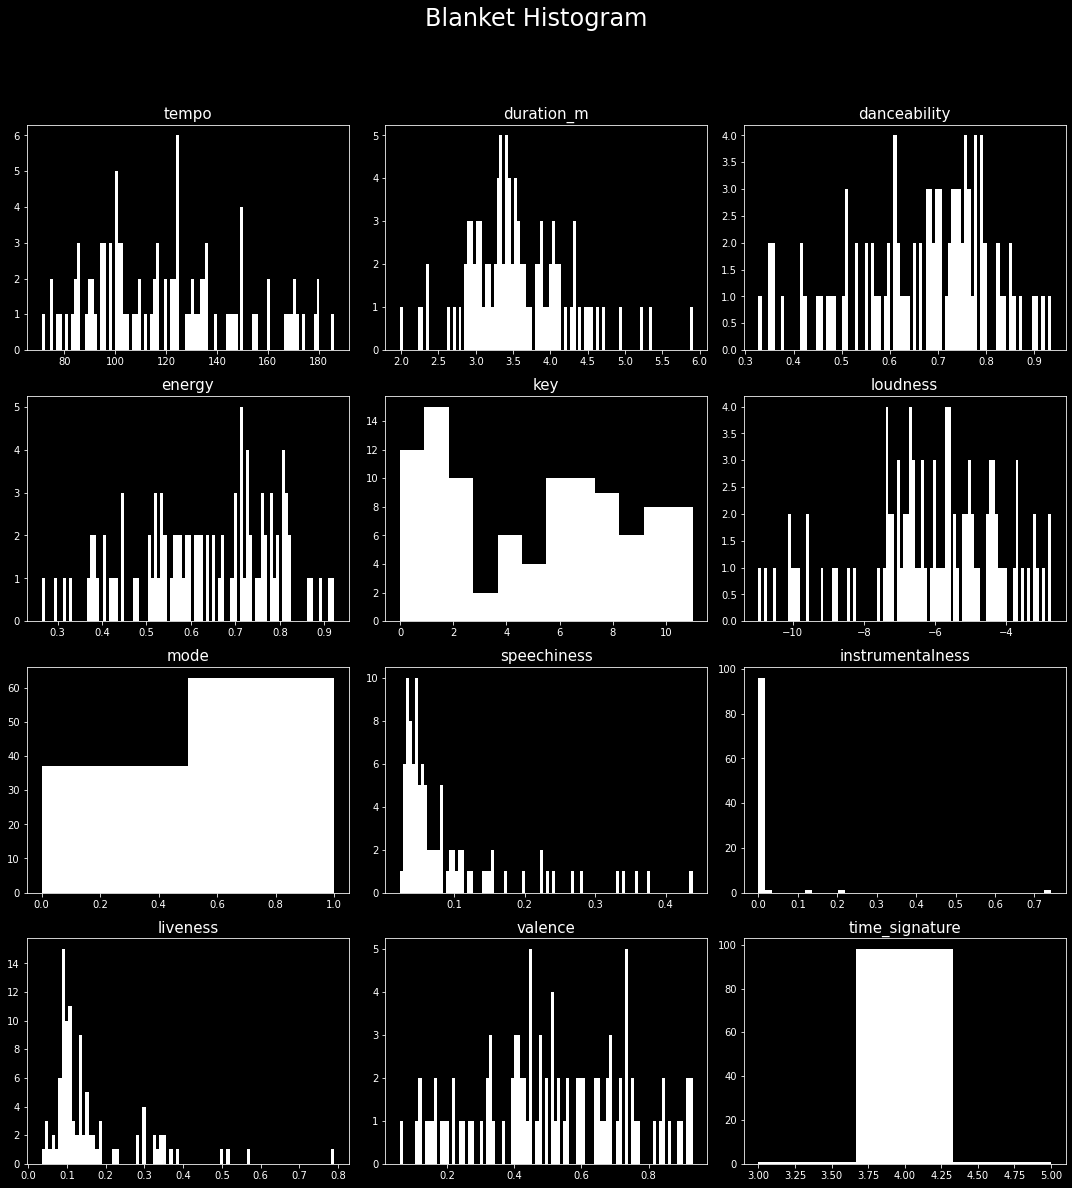

In [22]:
ds2 = df[["tempo",
            "duration_m",
            "danceability",
            "energy",
            "key",
            "loudness",
            "mode",
            "speechiness",
            "instrumentalness",
            "liveness",
            "valence",
            "time_signature"
            ]]

# ds2 = df

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Blanket Histogram',
                horizontalalignment="center",
                fontstyle = "normal", 
                fontsize = 24, 
                fontfamily = "sans-serif")

for i in range(ds2.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(ds2.columns.values[i],fontsize='15')

    vals = np.size(ds2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(ds2.iloc[:, i], 
                bins=vals, 
                color = 'white')

mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.03, 1, 0.95])

Most Positive Correlations: 
 energy            0.223184
speechiness       0.201568
time_signature    0.100171
loudness          0.066138
mode              0.058856
dtype: float64

Most Negative Correlations: 
 instrumentalness   -0.032174
danceability       -0.066842
valence            -0.080058
liveness           -0.092245
duration_m         -0.099529
key                -0.112051
dtype: float64


Text(0.5, 1.0, 'Tempo Correlation \n')

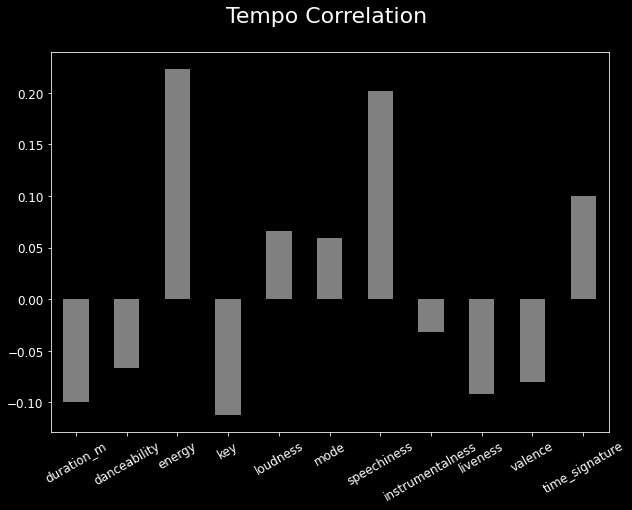

In [23]:
# ds2 = df[['tempo', 
#             'energy',
#             'duration_m',
#             'speechiness',
#             'danceability'
#             # 'duration_m',
#             ]]

ds2 = df

correlations = ds2.corrwith(df.tempo)
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations <0].sort_values(ascending = False)

# Printing values
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations.plot.bar(figsize = (10, 7), 
                        fontsize = 12, 
                        color = 'grey',
                        rot = 30)

mpl.title('Tempo Correlation \n',
            horizontalalignment="center", 
            fontstyle = "normal", 
            fontsize = "22", 
            fontfamily = "sans-serif")

Most Positive Correlations: 
 valence         1.000000
danceability    0.417351
energy          0.307806
loudness        0.268079
key             0.107062
speechiness     0.023174
dtype: float64

Most Negative Correlations: 
 time_signature     -0.018828
tempo              -0.080058
mode               -0.121467
instrumentalness   -0.123744
liveness           -0.124469
duration_m         -0.214073
dtype: float64


Text(0.5, 1.0, 'Valence (Positivity) Correlation \n')

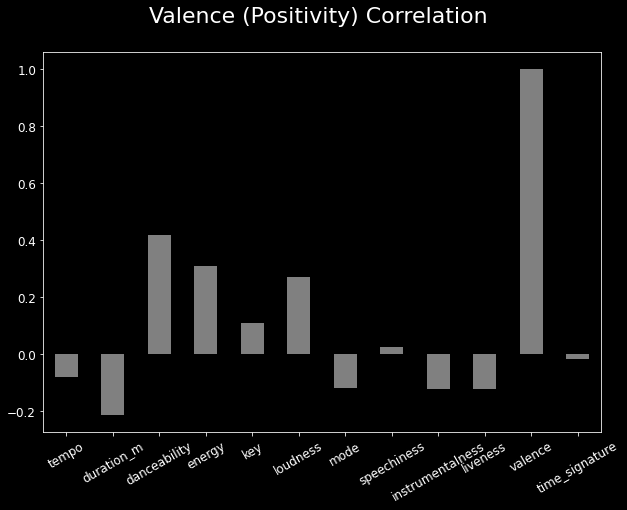

In [24]:
# ds2 = df[['tempo', 
#             'energy',
#             'duration_m',
#             'speechiness',
#             'danceability'
#             # 'duration_m',
#             ]]

ds2 = df

correlations = ds2.corrwith(df.valence)
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations <0].sort_values(ascending = False)

# Printing values
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations.plot.bar(figsize = (10, 7), 
                        fontsize = 12, 
                        color = 'grey',
                        rot = 30
                        )

mpl.title('Valence (Positivity) Correlation \n',
            horizontalalignment="center", 
            fontstyle = "normal", 
            fontsize = "22", 
            fontfamily = "sans-serif")